# **Curva de persecución**

Tamaño del paso h: 0.05
Tiempo inicial: 0
Tiempo final: 10
Valor inicial xp: 0
Valor inicial yp: 0


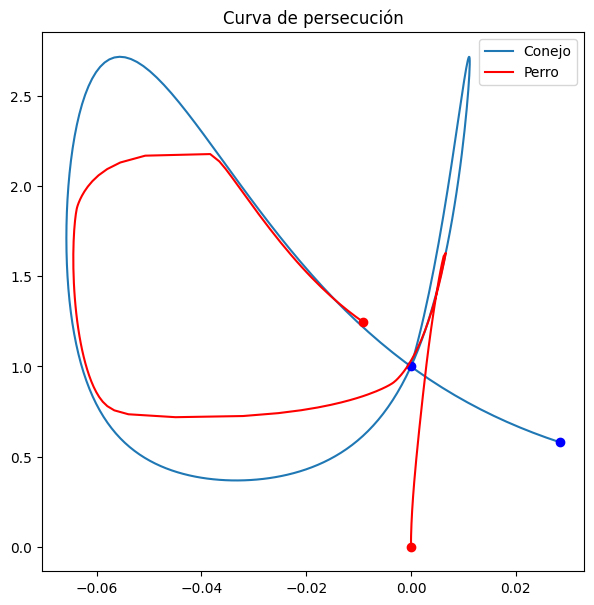

In [1]:
import matplotlib.pyplot as plt
from sympy import *
from sympy import symbols
import math

q = symbols('q')

def norma(w):
  r = 0
  for i in w:
    r += i**2
  return(r**(1/2))

def c(t): #Conejo
  c1 = 0.01*t*cos(0.5*t)
  c2 = (2.718)**sin(t)
  return((c1,c2))

def cp(t): #Velocidad del conejo
  return((diff(c(q)[0],q).subs(q,t),diff(c(q)[1],q).subs(q,t)))


def u(t,xp,yp): #Vector paralelo
  return((c(t)[0]-xp,c(t)[1]-yp))

g = lambda x : 0.5*x

def xpp(t,xp,yp):
  vc = norma(cp(t)) #Velocidad del conejo
  vp = g(vc) #Velocidad del perro
  return(u(t,xp,yp)[0]/((1/vp)*(norma(u(t,xp,yp)))))
def ypp(t,xp,yp):
  vc = norma(cp(t)) #Velocidad del conejo
  vp = g(vc) #Velocidad del perro
  return(u(t,xp,yp)[1]/((1/vp)*(norma(u(t,xp,yp)))))

#h = float(input("Tamaño del paso h: ")) 
h = 0.05
print("Tamaño del paso h:",h)
#ti = float(input("Tiempo inicial: "))
ti = 0
print("Tiempo inicial:",ti)
tf = float(input("Tiempo final: "))
xp = float(input("Valor inicial xp: ")) 
yp = float(input("Valor inicial yp: "))   

def RungeKutta4(h,ti,tf,x1,x2,f1,f2):
  n = int((tf-ti)/h)
  X1 = [x1]
  X2 = [x2]
  T = [ti + i*h for i in range(0,n+1)]
  for i in range(len(T)):
    k11 = h*f1(T[i],x1,x2)
    k21 = h*f2(T[i],x1,x2)
    k12 = h*f1(T[i]+h/2,x1+(1/2)*k11,x2+(1/2)*k21)
    k22 = h*f2(T[i]+h/2,x1+(1/2)*k11,x2+(1/2)*k21)
    k13 = h*f1(T[i]+h/2,x1+(1/2)*k12,x2+(1/2)*k22)
    k23 = h*f2(T[i]+h/2,x1+(1/2)*k12,x2+(1/2)*k22)
    k14 = h*f1(T[i]+h,x1+k13,x2+k23)
    k24 = h*f2(T[i]+h,x1+k13,x2+k23)
    x1 = x1 + (1/6)*(k11+2*k12+2*k13+k14)
    x2 = x2 + (1/6)*(k21+2*k22+2*k23+2*k24)
    X1.append(x1)
    X2.append(x2)
  return((T,X1,X2))

I = RungeKutta4(h,ti,tf,xp,yp,xpp,ypp)
C = [(c(t)[0],c(t)[1]) for t in I[0]]
Cx = [r[0] for r in C]
Cy = [r[1] for r in C]
fig = plt.figure(figsize=(7,7))
plt.plot(Cx,Cy,label="Conejo")
plt.plot([c(ti)[0]],[c(ti)[1]],'bo',[c(tf)[0]],[c(tf)[1]],'bo')
plt.plot(I[1],I[2],'r',label="Perro")
plt.plot([xp],[yp],'ro',I[1][-1],I[2][-1],'ro')
plt.title("Curva de persecución")
plt.legend()
plt.show()

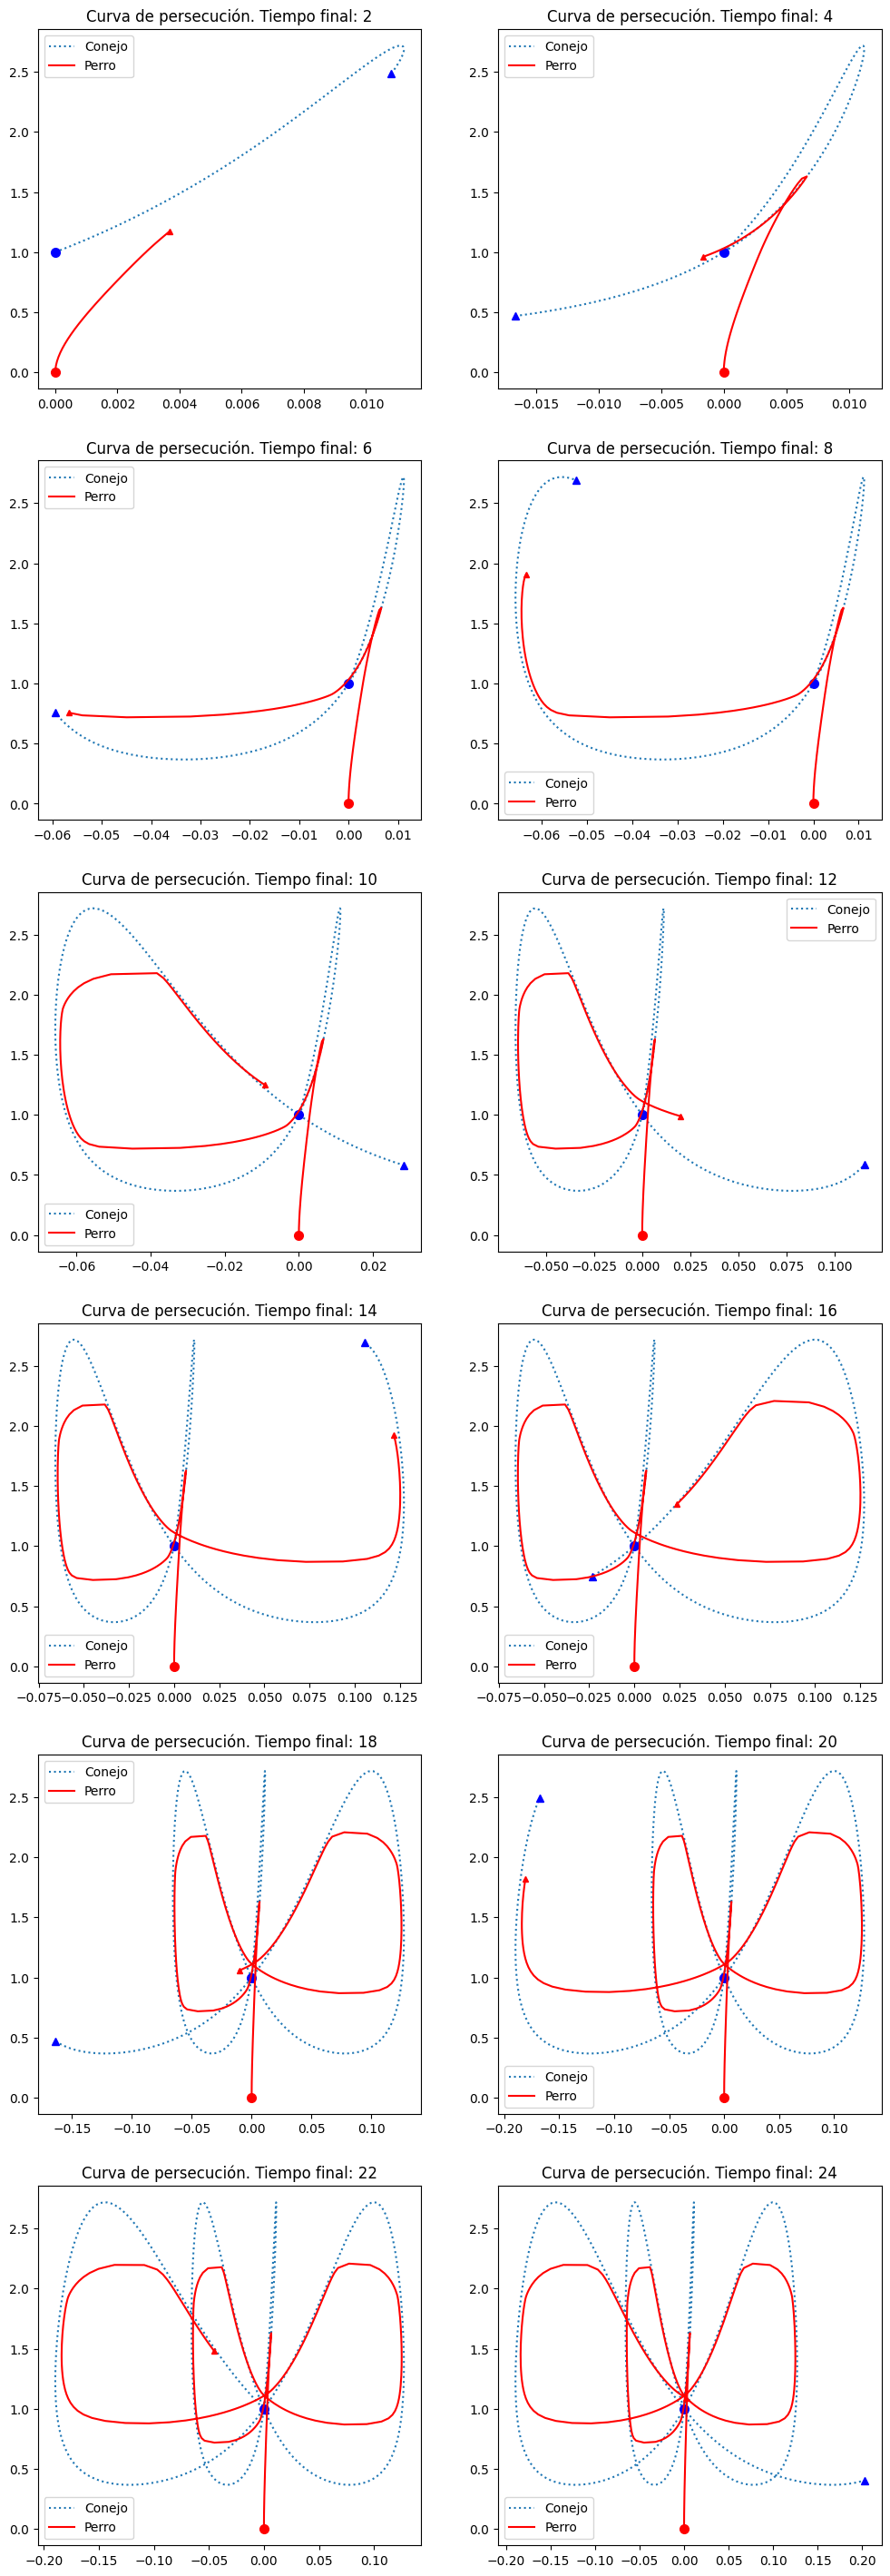

In [2]:
import numpy as np

fig = plt.figure(figsize=(12,36))
for k in np.arange(1,13,1):
  h = 0.05
  ti = 0
  tf = 2*k
  xp = 0
  yp = 0
  I = RungeKutta4(h,ti,tf,xp,yp,xpp,ypp)
  C = [(c(t)[0],c(t)[1]) for t in I[0]]
  Cx = [r[0] for r in C]
  Cy = [r[1] for r in C]
  plt.subplot(6,2,k)
  plt.plot(Cx,Cy,':',label="Conejo")
  plt.plot([c(ti)[0]],[c(ti)[1]],'b',marker='o',ms=7)
  plt.plot([c(tf)[0]],[c(tf)[1]],'b',marker = '^')
  plt.plot(I[1],I[2],'r',label="Perro")
  plt.plot([xp],[yp],'r',marker='o',ms=7)
  plt.plot(I[1][-1],I[2][-1],'r',marker='^',ms=5)
  plt.title(f"Curva de persecución. Tiempo final: {tf}")
  plt.legend()
plt.show()